보스턴 집 값 예측


*  url: https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv



In [1]:
#라이브러리 사용
import tensorflow as tf
import pandas as pd

In [3]:
# 1. 과거 데이터 준비
fileurl = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
#how to use rocal file? 
#1.csv 파일 준비. 2. 콜라보레이터의 파일에 로컬파일 업로드 3. 경로복사 4. 파일경로에 입력.
bost = pd.read_csv(fileurl)
print(bost.columns)
bost.head() #printing top5 data

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# separate inde, de various
inde = bost[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat']]
de = bost[['medv']]
print(inde.shape,de.shape) #분리 후 shape 확인 --> 사용하려는 데이터 직접확인위해

(506, 13) (506, 1)


In [8]:
# 2. make model
X = tf.keras.layers.Input(shape=[13]) # 독립변수 개수
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X,Y)
model.compile(loss='mse')


In [20]:
# 데이터로 모델 학습(fit)
model.fit(inde, de, epochs=10) # verbose=0

Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 25.0917
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 25.3978
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 25.1781
Epoch 4/10
16/16 [==============================] - 0s 957us/step - loss: 25.0546
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 25.0668
Epoch 6/10
16/16 [==============================] - 0s 1ms/step - loss: 25.2611
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 24.9581
Epoch 8/10
16/16 [==============================] - 0s 989us/step - loss: 25.1906
Epoch 9/10
16/16 [==============================] - 0s 960us/step - loss: 25.6146
Epoch 10/10
16/16 [==============================] - 0s 1ms/step - loss: 24.8505


In [23]:
# 4. 모델을 이용
model.predict(inde[0:5]) #독립변수들(0~5) 모델에 넣고 예측하기

array([[29.171452],
       [24.113508],
       [30.252293],
       [29.40387 ],
       [28.845768]], dtype=float32)

In [22]:
de[0:5] # 종속변수의 0~5번째 까지 데이터 불러오기(비교위해 )

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
# 모델의 수식 확인 (우리가 만든 모델이 뭐지?)
model.get_weights()

[array([[-8.9326970e-02],
        [ 6.4373679e-02],
        [-5.7449255e-02],
        [ 3.1948440e+00],
        [ 2.3158736e+00],
        [ 4.5644512e+00],
        [-6.0289982e-05],
        [-9.7966856e-01],
        [ 1.6129707e-01],
        [-1.0648796e-02],
        [-1.7296185e-01],
        [ 1.4269432e-02],
        [-5.3004861e-01]], dtype=float32), array([3.5127375], dtype=float32)]

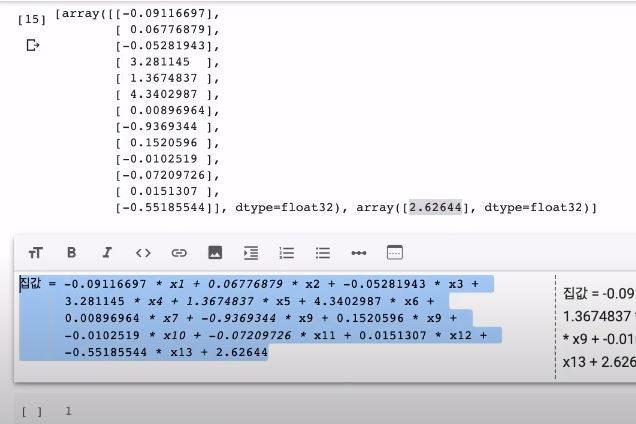